#Supervised Learning
##LAB-4TASK


To tackle the Titanic prediction project using k-NN and Decision Trees, we'll follow the specified steps in three main parts: Data Exploration and Preprocessing, Implementing k-NN and Decision Trees, and Visualization. Below is a structured approach to achieve this.

###Part 1: Data Exploration and Preprocessing

 We loaded the Titanic dataset, visualized important features, handled missing values, encoded categorical variables, and standardized numerical features.

Load the dataset and display the first few rows.
Visualize the distribution of key features such as Pclass, Age, Sex, etc.
Check for missing values and outliers.
Handle missing values (e.g., fill with median or remove).
Encode categorical variables like Sex and Embarked.
Standardize or normalize numerical features like Age and Fare.


###Part 2: Implementing k-NN and Decision Trees

 We trained both k-NN and Decision Tree models on the training data, made predictions, and evaluated performance metrics such as accuracy, precision, recall, and F1-score.

Split the dataset into training and testing sets.
Train k-NN and Decision Tree models.
Evaluate model performance using accuracy, precision, recall, and F1-score.


###Part 3: Visualization
 We visualized the decision boundaries of both models and compared their performance using a bar chart.

Create visualizations to display decision boundaries.
Plot performance metrics in a bar chart.




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


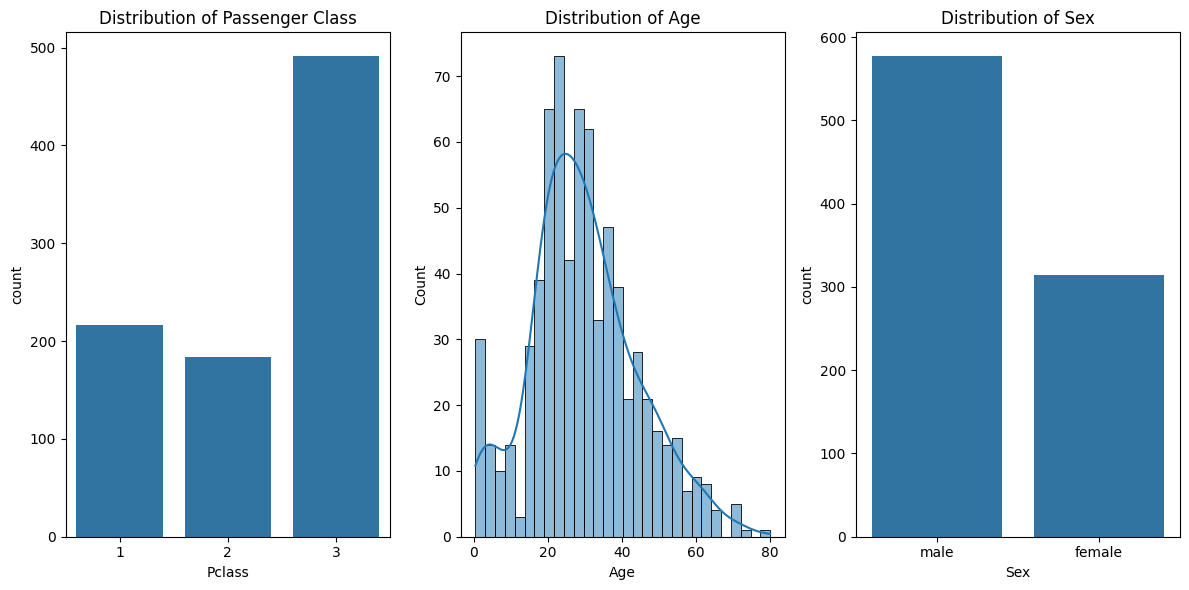

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
k-NN Model Performance:
Accuracy: 0.8134328358208955
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.84      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268

Decision Tree Model Performance:
Accuracy: 0.8059701492537313
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

<Figure size 1000x600 with 0 Axes>

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic_data.head())

# Visualize the distribution of key features
plt.figure(figsize=(12, 6))

# Distribution of Pclass
plt.subplot(1, 3, 1)
sns.countplot(data=titanic_data, x='Pclass')
plt.title('Distribution of Passenger Class')

# Distribution of Age
plt.subplot(1, 3, 2)
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')

# Distribution of Sex
plt.subplot(1, 3, 3)
sns.countplot(data=titanic_data, x='Sex')
plt.title('Distribution of Sex')

plt.tight_layout()
plt.show()

# Check for missing values
print(titanic_data.isnull().sum())

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)  # Drop Cabin due to many missing values

# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Standardize numerical features
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Define features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic_data['Survived']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate k-NN model
print("k-NN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Implement Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree model
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Visualizing decision boundaries using k-NN and Decision Tree
def plot_decision_boundaries(X, y, model, title):
    plt.figure(figsize=(10, 6))

    # Use only 'Pclass' and 'Fare' for visualization
    X_plot = X[['Pclass', 'Fare']].values
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict using only Pclass and Fare for the grid
    Z = model.predict(np.c_[xx.ravel(), np.zeros_like(xx.ravel()) + np.mean(X['Age'])])  # Keeping Age constant
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot of the data points
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Passenger Class')
    plt.ylabel('Fare')
    plt.title(title)
    plt.show()

# Plot decision boundaries for k-NN
plot_decision_boundaries(X_train, y_train, knn, "k-NN Decision Boundary")

# Plot decision boundaries for Decision Tree
plot_decision_boundaries(X_train, y_train, decision_tree, "Decision Tree Decision Boundary")

# Performance Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [accuracy_score(y_test, y_pred_knn),
              classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'],
              classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'],
              classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score']]

tree_scores = [accuracy_score(y_test, y_pred_tree),
               classification_report(y_test, y_pred_tree, output_dict=True)['1']['precision'],
               classification_report(y_test, y_pred_tree, output_dict=True)['1']['recall'],
               classification_report(y_test, y_pred_tree, output_dict=True)['1']['f1-score']]

# Create a bar chart to compare performance
bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, knn_scores, bar_width, label='k-NN')
plt.bar(index + bar_width, tree_scores, bar_width, label='Decision Tree')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.tight_layout()
plt.show()
